In [287]:
# Imports
import numpy as np
from scipy import io as sio
from sklearn import metrics as skm
from matplotlib import pyplot as plt
from statsmodels.stats import inter_rater as sir

In [288]:
%matplotlib inline

In [304]:
network = 3
path_1 = '/data1/guilimin/data/preventAD/subtype_TRT/subtype/sc7/pre/base_r1/network_{0}/network_{0}_subtype.mat'.format(network)
path_2 = '/data1/guilimin/data/preventAD/subtype_TRT/subtype/sc7/pre/base_r2/network_{0}/network_{0}_subtype.mat'.format(network)

In [305]:
part_1 = sio.loadmat(path_1)['part']
sord_1 = sio.loadmat(path_1)['subj_order'].astype(int).flatten()-1
part_2 = sio.loadmat(path_2)['part']
sord_2 = sio.loadmat(path_2)['subj_order'].astype(int).flatten()-1

In [306]:
skm.adjusted_rand_score(part_1.flatten(), part_2.flatten())

0.09371298134613729

In [307]:
part_1.flatten()

array([ 5.,  5.,  4.,  5.,  2.,  5.,  2.,  2.,  5.,  5.,  5.,  2.,  3.,
        4.,  4.,  3.,  4.,  5.,  4.,  1.,  5.,  1.,  5.,  1.,  2.,  4.,
        5.,  5.,  3.,  4.,  4.,  4.,  1.,  5.,  5.,  4.,  5.,  1.,  4.,
        4.,  1.,  1.,  4.,  4.,  5.,  5.,  5.,  3.,  5.,  5.,  4.,  4.,
        1.,  4.,  1.,  3.,  4.,  4.,  4.,  4.,  3.,  5.,  2.,  4.,  5.,
        5.,  3.,  5.,  5.,  5.,  5.,  3.,  5.,  2.,  2.,  5.,  4.,  3.,
        5.,  1.,  2.,  3.,  4.,  4.,  5.,  3.,  4.])

In [291]:
mat_1 = np.zeros((87,87))
mat_2 = np.zeros((87,87))

In [292]:
for x in range(87):
    for y in range(87):
        if part_1[x] == part_1[y]:
            mat_1[x,y] = 1
        if part_2[x] == part_2[y]:
            mat_2[x, y] = 1

In [293]:
# Take the lower traingle of the matrix and compare
mlt = np.tril(np.ones((87,87)),-1).astype(bool)
lt_1 = mat_1[mlt]
lt_2 = mat_2[mlt]
conc = np.concatenate((lt_1[..., None], lt_2[..., None]),1)
ctab = sir.to_table(conc)
kappa = sir.cohens_kappa(ctab[0], return_results=False)
print(kappa)

0.0897466879504


In [294]:
skm.adjusted_rand_score(lt_1, lt_2)

0.04663016967076518

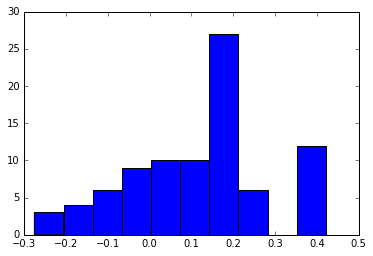

In [295]:
a = [np.corrcoef(mat_1[x,:], mat_2[x,:])[0,1] for x in range(87)]
tmp = plt.hist(a)